## **California Housing Price**

Sumber data California Housing Price : [here](https://www.kaggle.com/datasets/camnugent/california-housing-prices) edited by Purwadhika

### **Contents**

1. Business Problem Understanding
2. Data Understanding & EDA
3. Data Preprocessing
4. Modeling
5. Kesimpulan
6. Rekomendasi

****

## **BUSINESS PROBLEM UNDERSTANDING**

### **Context**

California, *the Golden State*, merupakan sebuah negara bagian di Amerika Serikat yang terletak di Pesisir Pasifik. Dengan jumlah penduduk lebih dari 39,2 juta jiwa dan total area sekitar 423.970 km<sup>2</sup> menjadikan California sebagai negara bagian Amerika Serikat yang terpadat berdasarkan kepadatan penduduk. PDB (produk domestik bruto) California sebesar 3.598 triliun USD pada tahun 2022 menjadikannya sebagai ekonomi sub-nasional terbesar di dunia. California juga merupakan rumah bagi beberapa perusahaan terbesar di dunia seperti Google dan Facebook dan tempat tinggal orang-orang terkaya di dunia.

Perekonomian yang maju menjadikan California sebagai kota dengan market properti yang paling mahal di Amerika Serikat.

### **Problem Statement**

Berdasarkan data dari [redfin](https://www.redfin.com/state/California/housing-market), harga median sebuah rumah sekarang (Q1 2023) di California sudah mencapai 750k USD, lebih dari dua kali harga nasional (370k USD). California memiliki empat dari lima pasar perumahan termahal di AS, yaitu Silicon Valley, San Francisco, Orange County, dan San Diego. Namun, tingkat kemiskinan, jika disesuaikan dengan biaya hidup, adalah yang terburuk di negara ini. California menyumbang 12% dari dari total populasi AS, tetapi seperempatnya merupakan tunawisma.

Dalam 5 tahun terakhir *supply* perumahan di pasar properti California mengalami penurunan, sedangkan tren untuk *demand* cenderung meningkat. Meskipun di awal tahun 2023 terdapat penurunan yang sangat drastis pada *demand*, tetapi grafik terus naik di bulan selanjutnya. Keadaan ini menyebabkan *house market bubble* sehingga harga rumah mencapai level yang tidak masuk akal, bahkan untuk penduduk dengan ekonomi menengah. Sebuah agen *real-estate*, [houzeo](https://www.houzeo.com/blog/california-real-estate-market/#housing-market-bubble), dalam artikel mereka mengatakan bahwa *house market bubble* memang sudah terjadi di California.

Selanjutnya, untuk menangani masalah ini sebuah perusahaan properti membuat plan untuk membangun perumahan baru untuk menambah *supply* di pasar. **Perusahaan ingin mendapatkan prediksi harga dari rumah yang akan dibangun sebagai pertimbangan untuk perencanaan biaya pembangunan dan perhitungan revenue yang didapat**.

### **Goals**

Berdasarkan problem tersebut, perusahaan tentu menginginkan ***`tool`* yang membantu dalam perhitungan prediksi harga** yang nantinya akan membantu mereka untuk mengambil keputusan.

### **Analytic Approach**

Analisis dilakukan dengan menggunakan fitur-fitur yang dari data sensus, melihat pola dari tiap fitur dan perbedaan antara satu perumahan dengan perumahan lainnya. Selanjutnya **menggunakan regresi untuk membangun model** yang akan digunakan melakukan prediksi terhadap harga median dari perumahan, yang nantinya akan digunakan oleh perusahaan sebagai dasar pertimbangan untuk biaya pembangunan dan perhitungan revenue.

### **Metric Evaluation**



Terdapat tiga metrik evaluasi yang digunakan, yaitu :

1. **RMSE** : nilai rataan akar kuadrat dari error
2. **MAE** : rataan nilai absolut dari error
3. **MAPE** : rataan persentase error

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga perumahan sesuai dengan limitasi fitur yang digunakan. Selain itu, jika model yang bagus ternyata adalah model regresi linear, maka evaluasi metrik **R-Squared** juga akan digunakan. Untuk metrik R-Squared, semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi.

Dikarenakan RMSE dan MAE sangat dipengaruhi oleh outlier, maka sebisa mungkin semua outlier akan dihilangkan.

## **DATA UNDERSTANDING & EDA**

- Dataset merupakan data sensus pada tahun 1990 mengenai perumahan di kota California.
- Setiap baris data merepresentasikan informasi detail terkait suatu blok perumahan.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Koordinat bujur (longitude) |
| latitude | Float | Koordinat lintang (latitude) |
| housing_median_age | Float | Median usia rumah dalam suatu blok |
| total_rooms | Float | Jumlah kamar dalam suatu blok |
| total_bedrooms | Float | Jumlah kamar tidur dalam suatu blok |
| population | Float | Jumlah populasi dalam suatu blok |
| households | Float | Jumalah keluarga/grup (yang tinggal di rumah) untuk satu blok  |
| median_income | Float | Median pendapatan sebuat keluarga/grup di dalam blok (dalam satuan sepuluh ribu US Dollars) |
| ocean_proximity | object  | Lokasi rumah berdasarkan lautan |
| median_house_value | Float | Median nilai rumah dalam suatu blok (dalam satuan US Dollars) |

<br>

### **Import Library & Dataset**

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### **Exploratory Data Analysis**

In [4]:
display(df.describe(),df.describe(include='object'))
print('Volume data frame =', df.shape[0], 'baris dan', df.shape[1], 'kolom.')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


Volume data frame = 14448 baris dan 10 kolom.


Pada dataset terdapat sebanyak 14448 baris dan 10 kolom, yang berarti ada 14448 blok perumahan dan 10 fitur.

#### **Correlation**

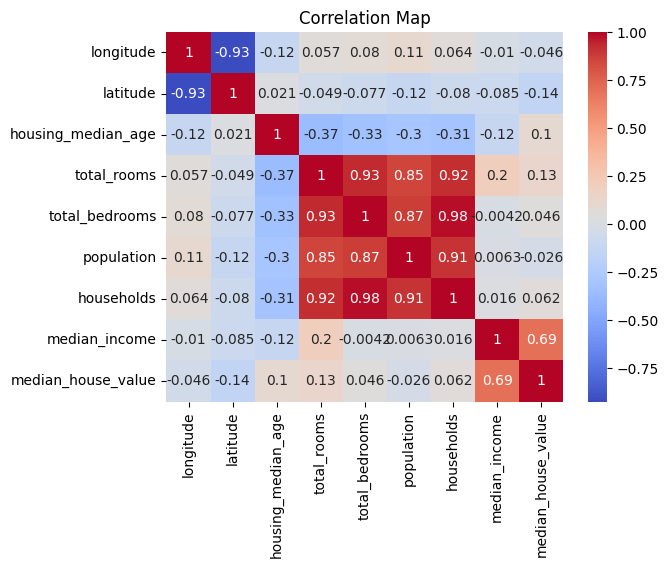

In [5]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

Hubungan antara kolom total_room, total_bedroom, population, dan households memiliki korelasi yang tinggi. Ini dikarenakan oleh populasi yang lebih besar tentu akan memiliki jumlah household (rumah tangga) yang lebih banyak, dengan jumlah household yang lebih banyak maka akan dibutuhkan kamar atau pun kamar tidur yang lebih banyak juga.

Selain itu, dapat dilihat bahwa penghasilan (median_income) dan harga rumah (median_house_value) juga memiliki korelasi yang cukup tinggi. Hal ini menandakan penduduk cenderung tinggal di blok yang sesuai dengan penghasilan mereka.

In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

Dari data diatas dapat disimpulkan bahwa, sesuai sensus, blok perumahan di California paling banyak terdapat di dekat pesisir, mulai dari `NEAR OCEAN`, `NEAR BAY`, dan `<1H OCEAN`. Dan terdapat 2 blok perumahan yang terlatak di suatu pulau.

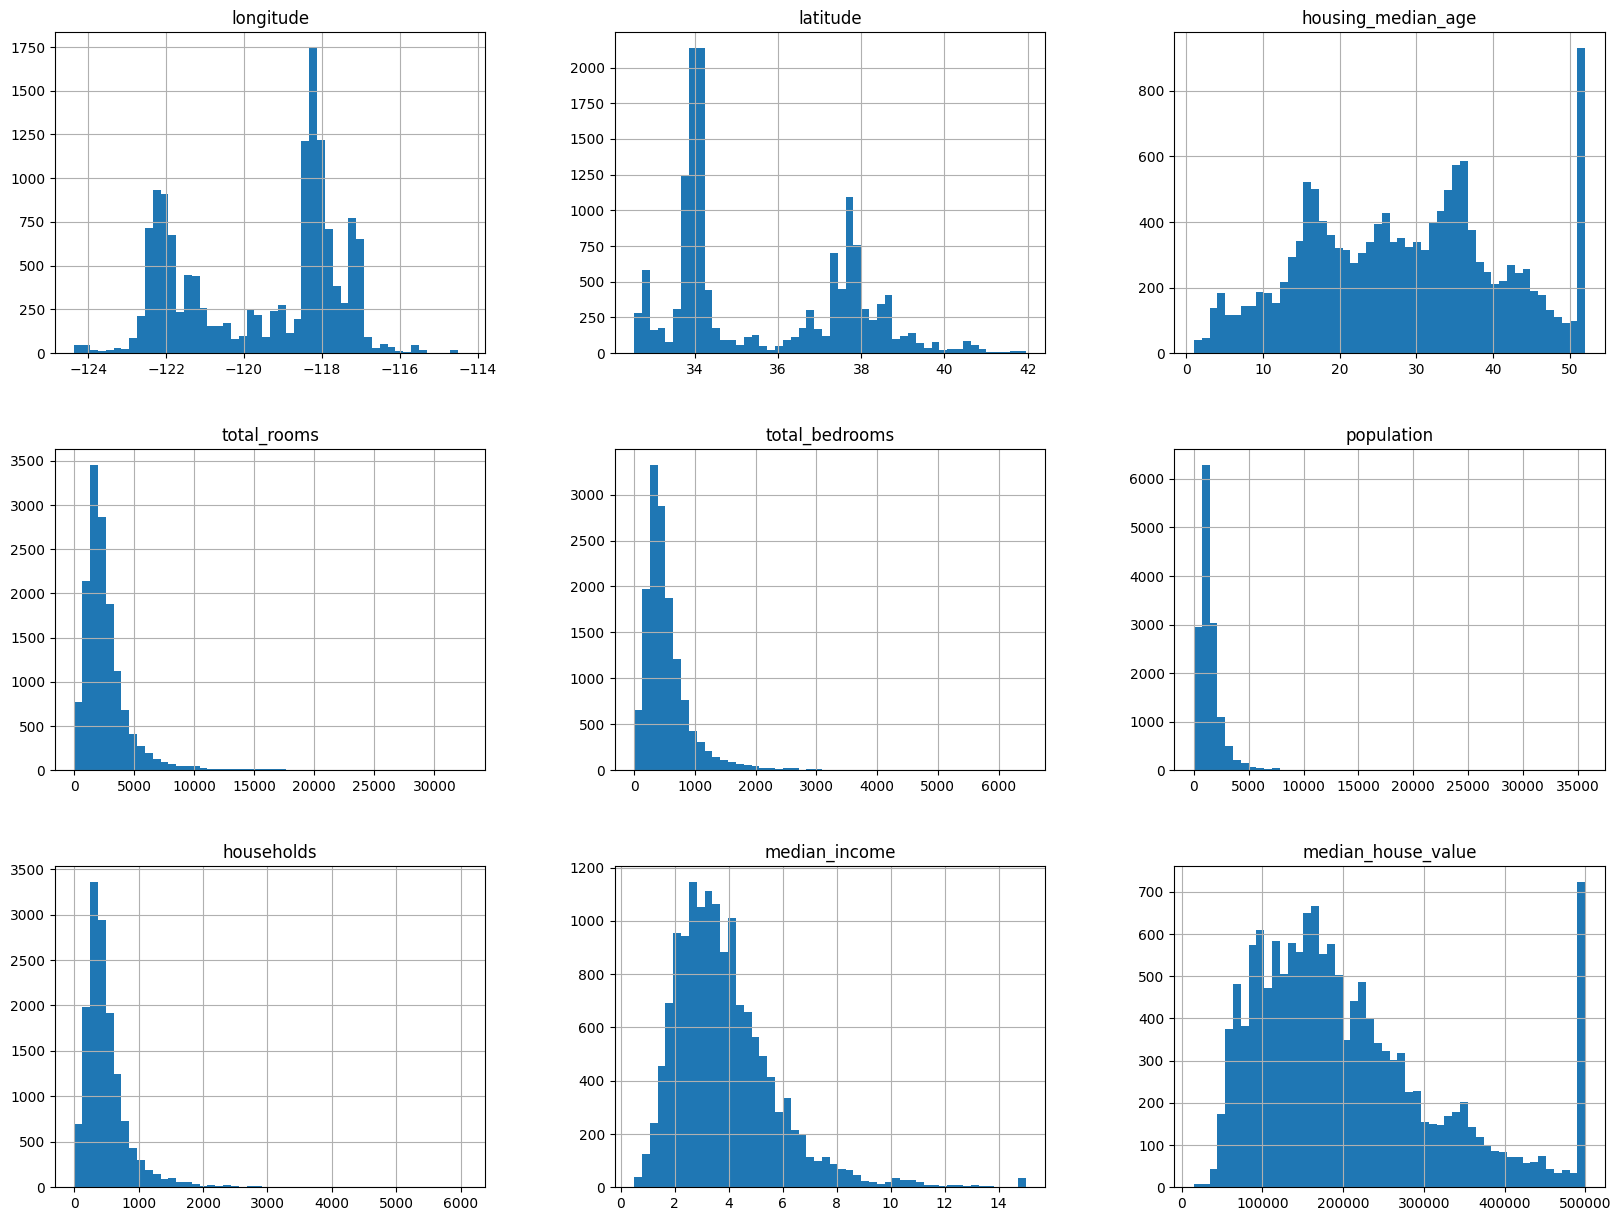

In [7]:
#Plot kolom numerik
df.hist(figsize=(20,15), bins=50);

Terdapat beberapa hal yang dapat kita ambil dari plot diatas, yaitu:

1. `longitude` dan `latitude` merupakan data lokasi dari perumahan, lokasi dari perumahan terlihat cukup terpusat di sekitar longitude -118 dan latitude 34. Hali ini cukup masuk akal, karena itu merupakan lokasi kota Los Angeles yang merupakan salah satu kota terpadat di US.
2. `housing_median_age` memiliki persebaran yang merata, menandakan selalu ada pembangunan perumahan dari tahun ke tahun, dan nilai pada bin dengan nilai 50 memiliki jumlah paling banyak, hal ini berarti terjadi banyak pembangunan blok perumahan pada tahun itu atau rumah yang lebih tua dimasukkan ke bin 50.
3. Selain dari 3 fitur sebelumnya, semua fitur numerik yang lain memiliki distribusi *right skewed*.
4. `median_house_value` memiliki jumlah yang besar pada bin 500000, ini menandakan terdapat banyak rumah yang memiliki harga diatas 50000 USD atau nilai rumah yang melewati batas bin dimasukkan ke dalam bin 500000.

## **DATA PREPROCESSING**

Data cleaning akan dilakukan pada salinan dataframe, yaitu df_model yang nantinya akan digunakan dalam pengujian model.

Terdapat beberapa hal yang dapat dilakukan dalam *data preprocessing*, yaitu:

1. Penambahan dan penghapusan kolom (fitur), sehingga dataframe sesuai dengan permasalan yang dihadapi
2. Handling *missing value*
4. Handling duplikat
3. Handling *outlier*

Selanjutnya data yang sudah melewati tahap ini akan digunakan untuk tahap selanjutnya.

### **Cek Fitur (Kolom)**

In [8]:
# Membuat salinan dataframe
df_model = df.copy()

In [9]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Tidak ada fitur yang perlu ditambah atau dihapus.

### **Cek Missing Value**

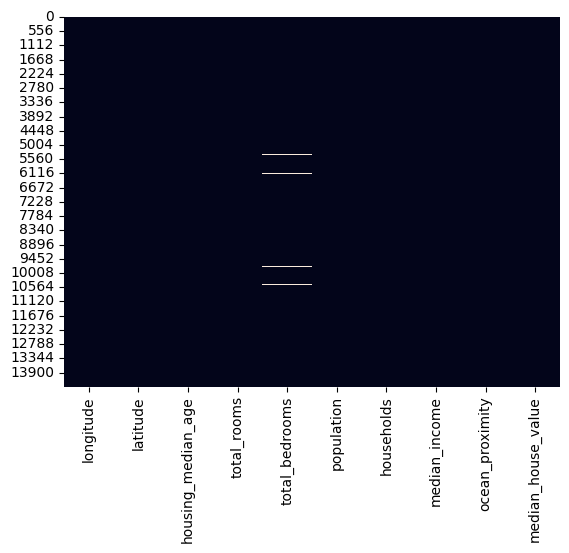

In [10]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

In [11]:
# Mengecek missing value
print(df_model.isnull().sum())
print('Total baris pada dataset =',df_model.shape[0])

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64
Total baris pada dataset = 14448


Terdapat satu kolom yang memiliki data kosong, yaitu pada kolom `total_bedrooms` sebanyak 137 baris dari total 14448 baris (sekitar ~0.95% dari total data), dapat diasumsikan bahwa jumlah data kosong tidak terlalu signifikan, sehingga dapat diabaikan saat menganalisa kolom `total_bedrooms`.

In [12]:
#Menghapus baris yang memiliki missing value
df_model.dropna(inplace=True)

In [13]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


### **Cek Data Duplikat**

In [14]:
print('Data duplikat pada dataset :', df_model.duplicated().sum(), 'kolom.')

Data duplikat pada dataset : 0 kolom.


Tidak ditemukan duplikasi yang ditemukan pada dataset.

In [15]:
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [16]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


### **Outlier**

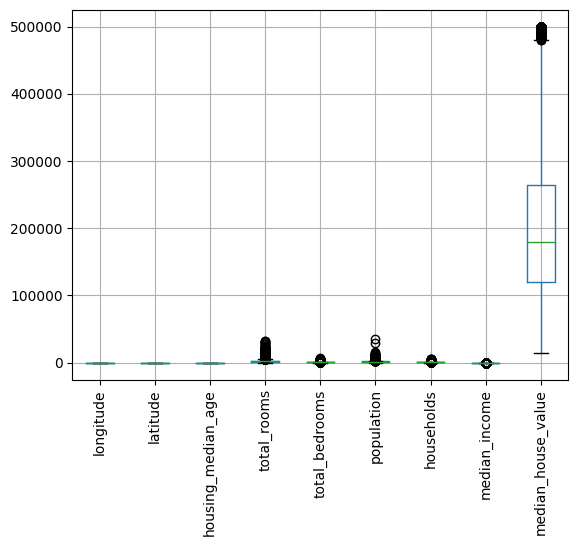

In [17]:
df_model.boxplot(rot=90);

Dari plot terlihat beberapa fitur yang memiliki, yaitu `total_rooms`, `total_bedrooms`, `population`, `household`, `median_income`, dan `median_house_value`. Selanjutnya akan dilakukan handling untuk tiap-tiap fitur.

In [18]:
# Membuat fungsi untuk mengecek outliers
def find_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

#### **Limit Outlier**

In [19]:
# Outliers pada kolom housing_median_age
find_outlier(df_model['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [20]:
# Outliers pada kolom total_rooms
find_outlier(df_model['total_rooms'])

IQR: 1690.0
limit_bawah: -1083.0
limit_atas: 5677.0


In [21]:
# Outliers pada kolom total_bedrooms
find_outlier(df_model['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [22]:
# Outliers pada kolom population
find_outlier(df_model['population'])

IQR: 938.0
limit_bawah: -623.0
limit_atas: 3129.0


In [23]:
# Outliers pada kolom households
find_outlier(df_model['households'])

IQR: 324.5
limit_bawah: -207.75
limit_atas: 1090.25


In [24]:
# Outliers pada kolom median_income
find_outlier(df_model['median_income'])

IQR: 2.1667000000000005
limit_bawah: -0.6806500000000009
limit_atas: 7.986150000000001


In [25]:
# Outliers pada kolom median_house_value
find_outlier(df_model['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


#### **Median House Age**

In [26]:
# Cek deskriptif statistik kolom housing_median_age
df_model['housing_median_age'].describe()

count    14311.000000
mean        28.609671
std         12.606493
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

`Limit atas adalah 65,5`<br>
Kolom ini tidak memiliki outlier karena tidak ada data yang melewati limit.

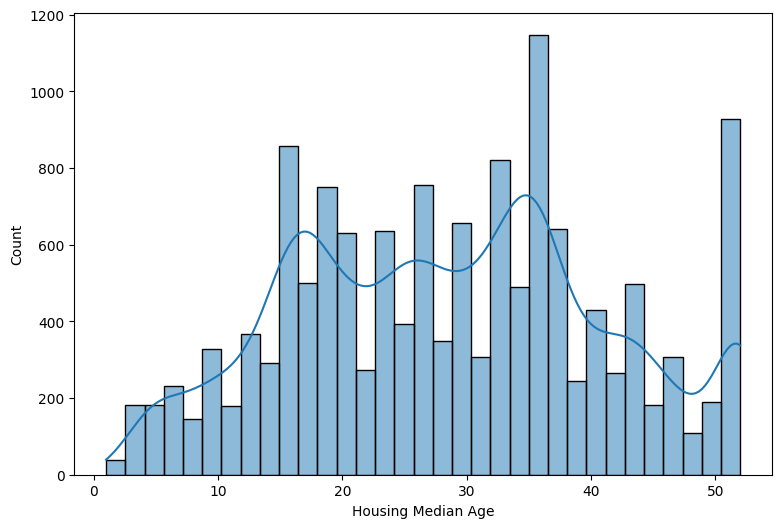

In [27]:
# Plot distribusi data
plt.figure(figsize=(9, 6))
sns.histplot(df_model['housing_median_age'], kde=True).set(xlabel='Housing Median Age');

#### **Total Rooms**

In [28]:
# Cek deskriptif statistik kolom total_rooms
df_model['total_rooms'].describe()

count    14311.000000
mean      2640.917686
std       2197.192896
min          2.000000
25%       1452.000000
50%       2125.000000
75%       3142.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [29]:
# Cek total_rooms > 5677
df_model[df_model['total_rooms'] > 5677].count()['total_rooms']

905

`Limit atas = 5677`<br>
Terdapat **905** data yang memiliki nilai > **5677**. Nilai maksimum untuk kolom total_rooms adalah **32627**, dengan rentang data 32625. Karena perbedaan yang sangat signifikan antara limit atas dan nilai maksimum pada kolom total_rooms, maka data yang melewati limit `tidak digunakan` dalam pembuatan model.

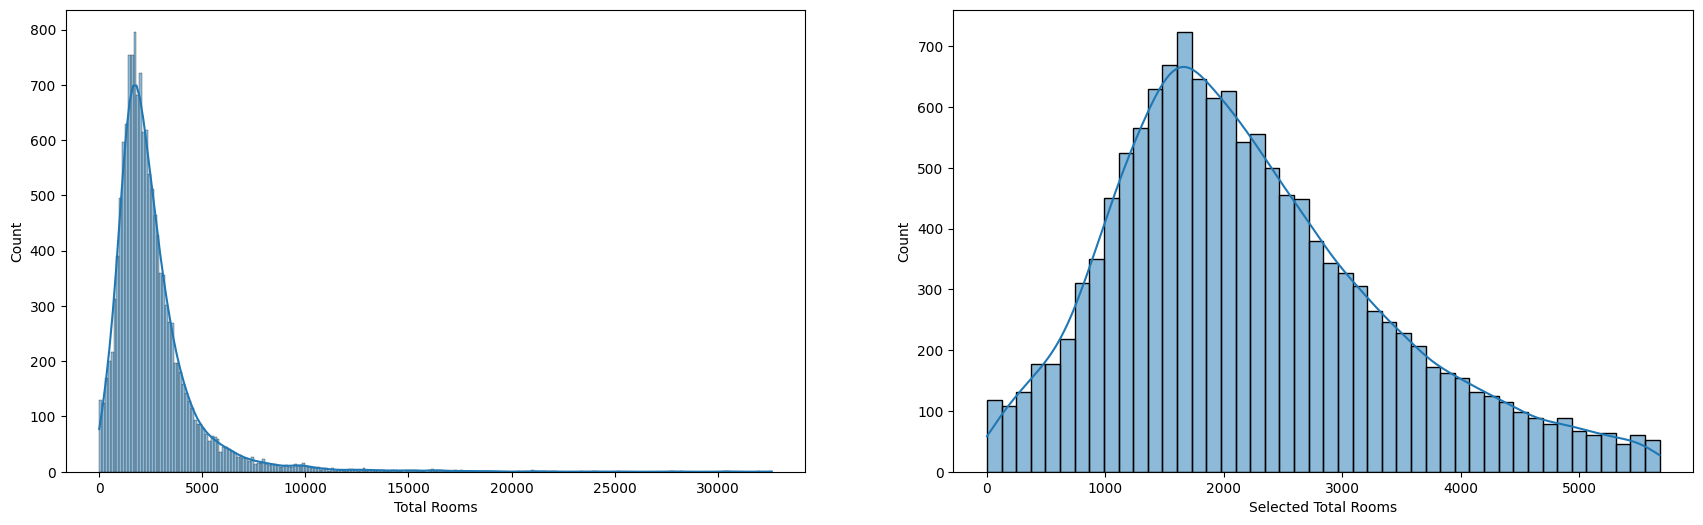

In [30]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
axes[0].set_xlabel('Total Rooms')
axes[1].set_xlabel('Selected Total Rooms')
sns.histplot(df_model['total_rooms'], ax=axes[0], kde=True)

# Melakukan filtering pada dataset
df_model = df_model[(df_model['total_rooms'] <= 5677)]

# Plot distribusi data setelah filtering
sns.histplot(df_model['total_rooms'], ax=axes[1], kde=True);

In [31]:
# Cek deskriptif statistik kolom 'total_rooms' setelah filtering
df_model['total_rooms'].describe()

count    13406.000000
mean      2220.195360
std       1150.196311
min          2.000000
25%       1407.250000
50%       2029.000000
75%       2881.000000
max       5677.000000
Name: total_rooms, dtype: float64

#### **Total Bedrooms**

In [32]:
# Cek deskriptif statistik kolom total_bedrooms
df_model['total_bedrooms'].describe()

count    13406.000000
mean       462.087498
std        252.641039
min          1.000000
25%        287.000000
50%        416.000000
75%        595.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

In [33]:
# Cek total_bedrooms > 1175
df_model[df_model['total_bedrooms'] > 1175].count()['total_bedrooms']

198

`Limit atas = 1175`<br>
Terdapat **198** data yang memiliki nilai > **1175**. Nilai maksimum untuk kolom total_bedrooms adalah **2610**, dengan rentang data 2609. Karena perbedaan yang signifikan antara limit atas dan nilai maksimum pada kolom total_bedrooms, maka data yang melewati limit `tidak digunakan` dalam pembuatan model.

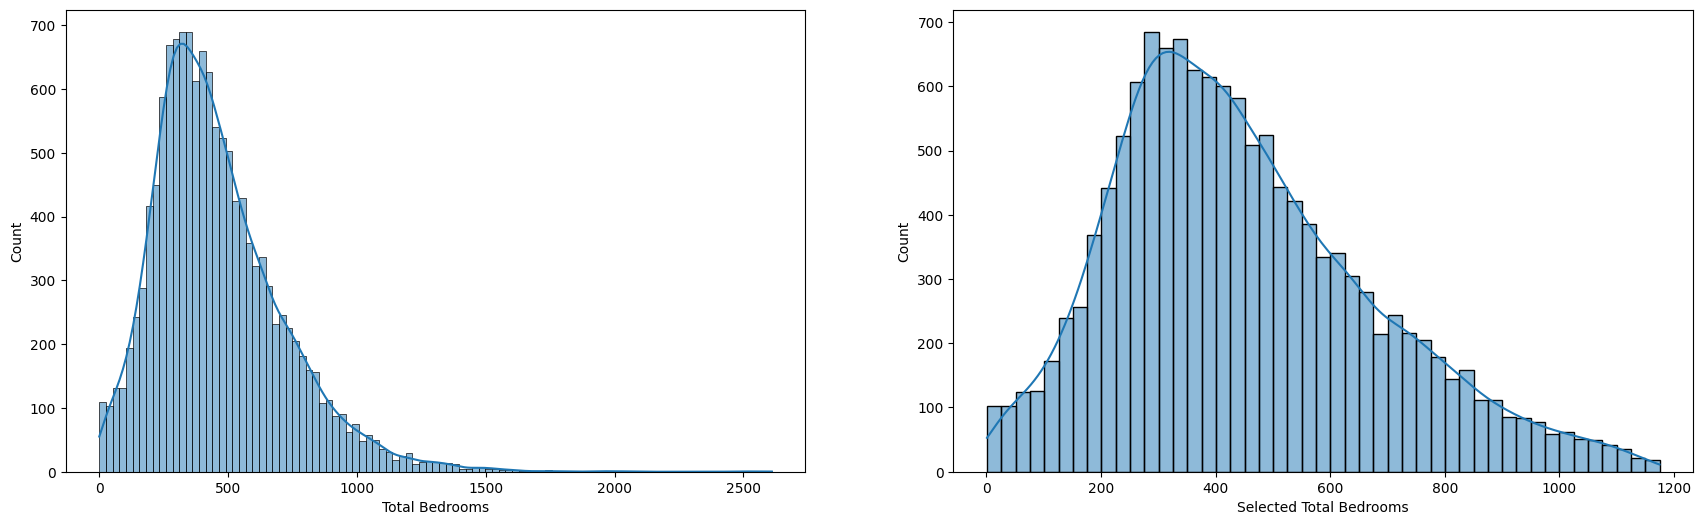

In [34]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
axes[0].set_xlabel('Total Bedrooms')
axes[1].set_xlabel('Selected Total Bedrooms')
sns.histplot(df_model['total_bedrooms'], ax=axes[0], kde=True)

# Melakukan filtering pada dataset
df_model = df_model[(df_model['total_bedrooms'] <= 1175)]

# Plot distribusi data setelah filtering
sns.histplot(df_model['total_bedrooms'], ax=axes[1], kde=True);

In [35]:
# Cek deskriptif statistik kolom 'total_bedrooms' setelah filtering
df_model['total_bedrooms'].describe()

count    13208.000000
mean       448.477286
std        226.965356
min          1.000000
25%        284.750000
50%        412.000000
75%        584.000000
max       1175.000000
Name: total_bedrooms, dtype: float64

#### **Population**

In [36]:
# Cek deskriptif statistik kolom population
df_model['population'].describe()

count    13208.000000
mean      1213.335630
std        668.178462
min          3.000000
25%        760.000000
50%       1102.000000
75%       1560.000000
max       8733.000000
Name: population, dtype: float64

In [37]:
# Cek population > 3129
df_model[df_model['population'] > 3129].count()['population']

172

`Limit atas = 3129`<br>
Terdapat **172** data yang memiliki nilai > **3129**. Nilai maksimum untuk kolom population adalah **8733**, dengan rentang data 8730. Karena perbedaan yang signifikan antara limit atas dan nilai maksimum pada kolom population, maka data yang melewati limit `tidak digunakan` dalam pembuatan model.

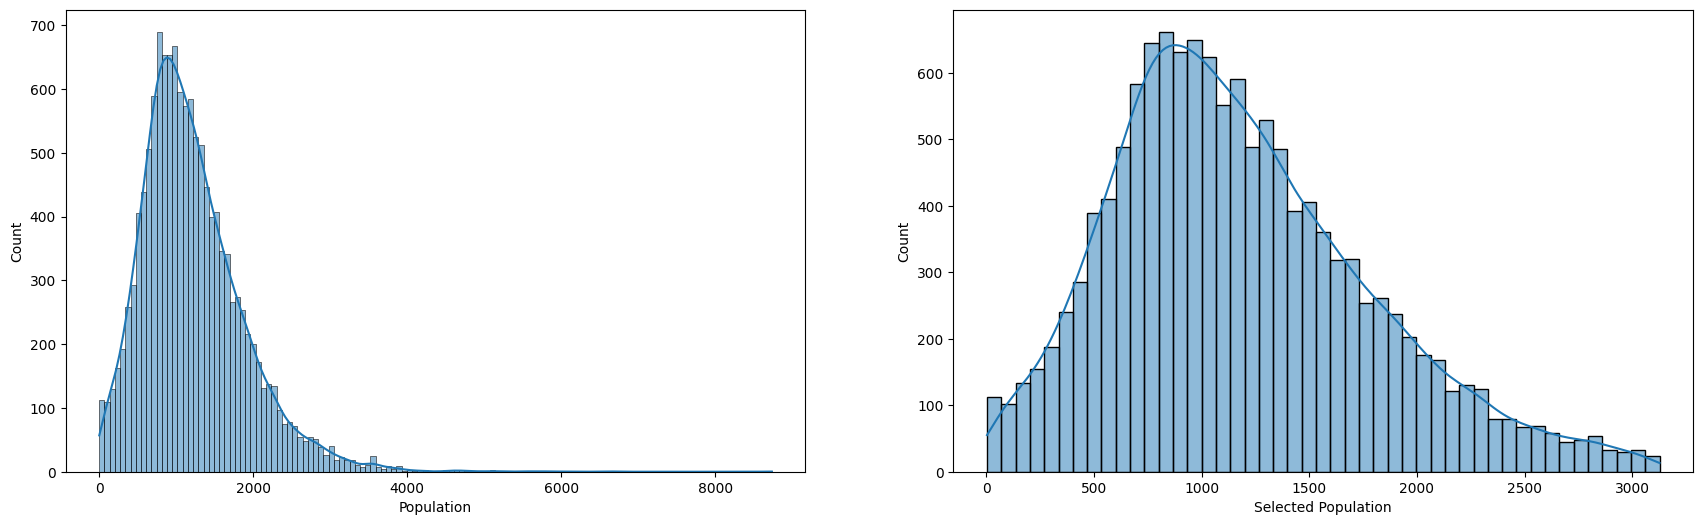

In [38]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
axes[0].set_xlabel('Population')
axes[1].set_xlabel('Selected Population')
sns.histplot(df_model['population'], ax=axes[0], kde=True)

# Melakukan filtering pada dataset
df_model = df_model[(df_model['population'] <= 3129)]

# Plot distribusi data setelah filtering
sns.histplot(df_model['population'], ax=axes[1], kde=True);

In [39]:
# Cek deskriptif statistik kolom 'population' setelah filtering
df_model['population'].describe()

count    13036.000000
mean      1179.959650
std        598.742807
min          3.000000
25%        754.000000
50%       1092.000000
75%       1537.000000
max       3127.000000
Name: population, dtype: float64

#### **Households**

In [40]:
# Cek deskriptif statistik kolom households
df_model['households'].describe()

count    13036.000000
mean       414.506674
std        205.525557
min          1.000000
25%        268.000000
50%        386.000000
75%        539.000000
max       1144.000000
Name: households, dtype: float64

In [41]:
# Cek households > 1090.25
df_model[df_model['households'] > 1090.25].count()['households']

5

`Limit atas = 1090.25`<br>
Terdapat **5** data yang memiliki nilai > **1090.25**. Nilai maksimum untuk kolom households adalah **1143**, dengan rentang data 1142. Karena perbedaan tidak signifikan antara limit atas dan nilai maksimum pada kolom households, maka data yang melewati limit `tetap digunakan` dalam pembuatan model.

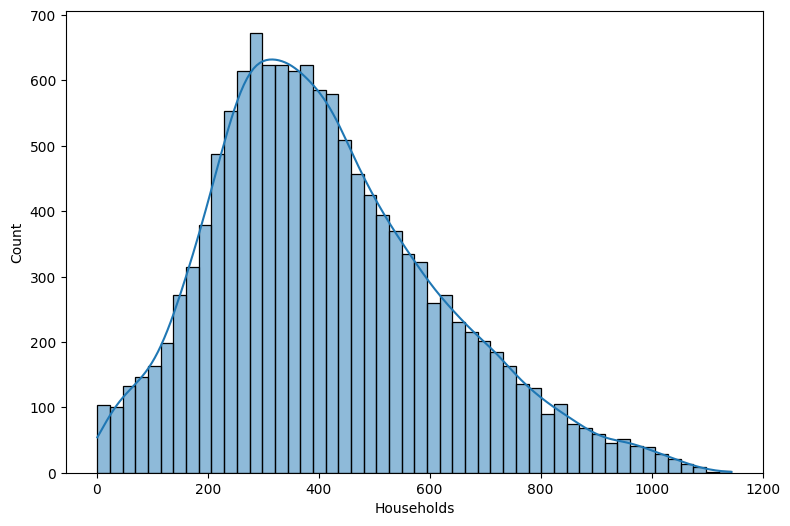

In [42]:
# Plot distribusi data
plt.figure(figsize=(9, 6))
sns.histplot(df_model['households'], kde=True).set(xlabel='Households');

#### **Median Income**

In [43]:
# Cek deskriptif statistik kolom median_income
df_model['median_income'].describe()

count    13036.000000
mean         3.833300
std          1.886134
min          0.499900
25%          2.547375
50%          3.515600
75%          4.700000
max         15.000100
Name: median_income, dtype: float64

In [44]:
# Cek median_income > 7.986
df_model[df_model['median_income'] > 7.986].count()['median_income']

415

`Limit atas = 7.986`<br>
Terdapat **415** data yang memiliki nilai > **7.986**. Nilai maksimum untuk kolom median_income adalah **15**, dengan rentang data 14.5. Karena perbedaan yang signifikan antara limit atas dan nilai maksimum pada kolom median_income, maka data yang melewati limit `tidak digunakan` dalam pembuatan model.

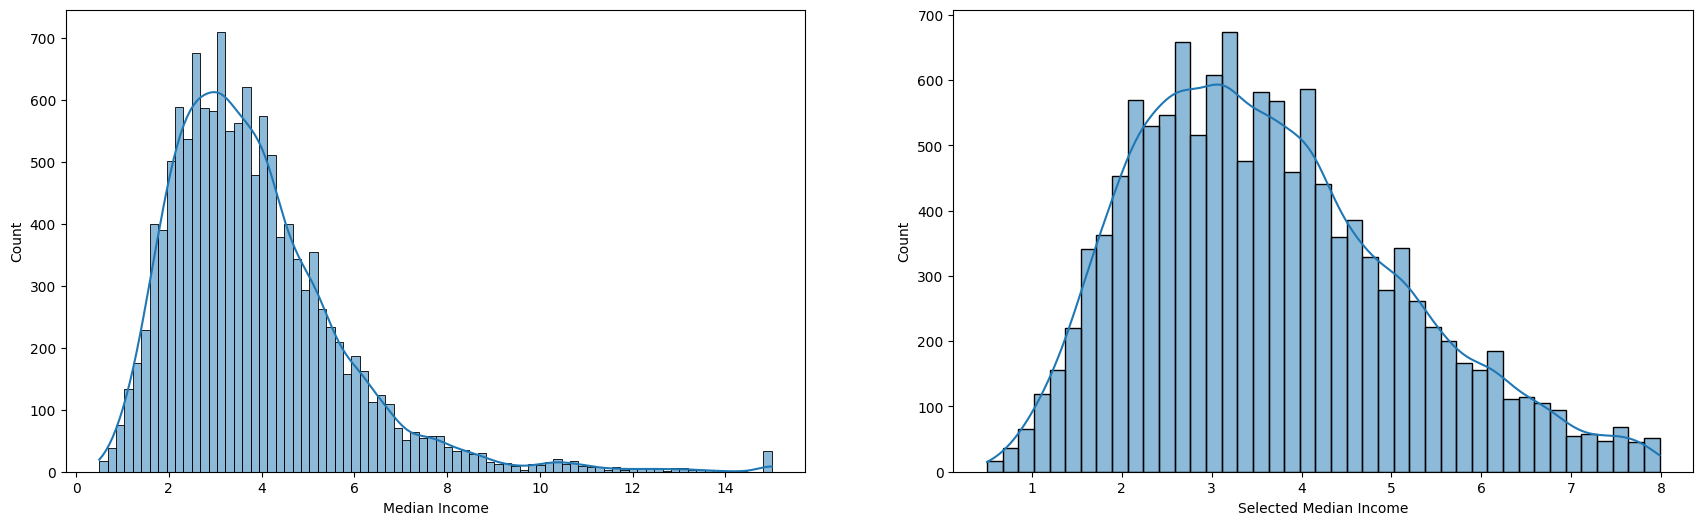

In [45]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
axes[0].set_xlabel('Median Income')
axes[1].set_xlabel('Selected Median Income')
sns.histplot(df_model['median_income'], ax=axes[0], kde=True)

# Melakukan filtering pada dataset
df_model = df_model[(df_model['median_income'] <= 7.986)]

# Plot distribusi data setelah filtering
sns.histplot(df_model['median_income'], ax=axes[1], kde=True);

In [46]:
# Cek deskriptif statistik kolom 'median_income' setelah filtering
df_model['median_income'].describe()

count    12621.000000
mean         3.625873
std          1.479001
min          0.499900
25%          2.515600
50%          3.446400
75%          4.552600
max          7.983500
Name: median_income, dtype: float64

#### **Median House Value**

In [47]:
# Cek deskriptif statistik kolom median_house_value
df_model['median_house_value'].describe()

count     12621.000000
mean     196474.472783
std      106663.854734
min       14999.000000
25%      114800.000000
50%      174200.000000
75%      250700.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [48]:
# Cek median_house_value > 480275
df_model[df_model['median_house_value'] > 480275].count()['median_house_value']

385

`Limit atas = 480275`<br>
Terdapat **385** data yang memiliki nilai > **480275**. Nilai maksimum untuk kolom median_house_value adalah **500001**, dengan rentang data 485002. Terdapat perbedaan yang tidak signifikan antara limit atas dan nilai maksimum pada kolom median_house_value, tetapi berdasarkan boxplot sebelumnya, outlier pada kolom median_house_value berpusat di suatu bin tertentu sehinnga dapat mempengaruhi analisis. Selain itu RMSE dan MAE sangat dipengaruhi oleh outlier, maka data yang melewati limit `tidak digunakan` dalam pembuatan model.

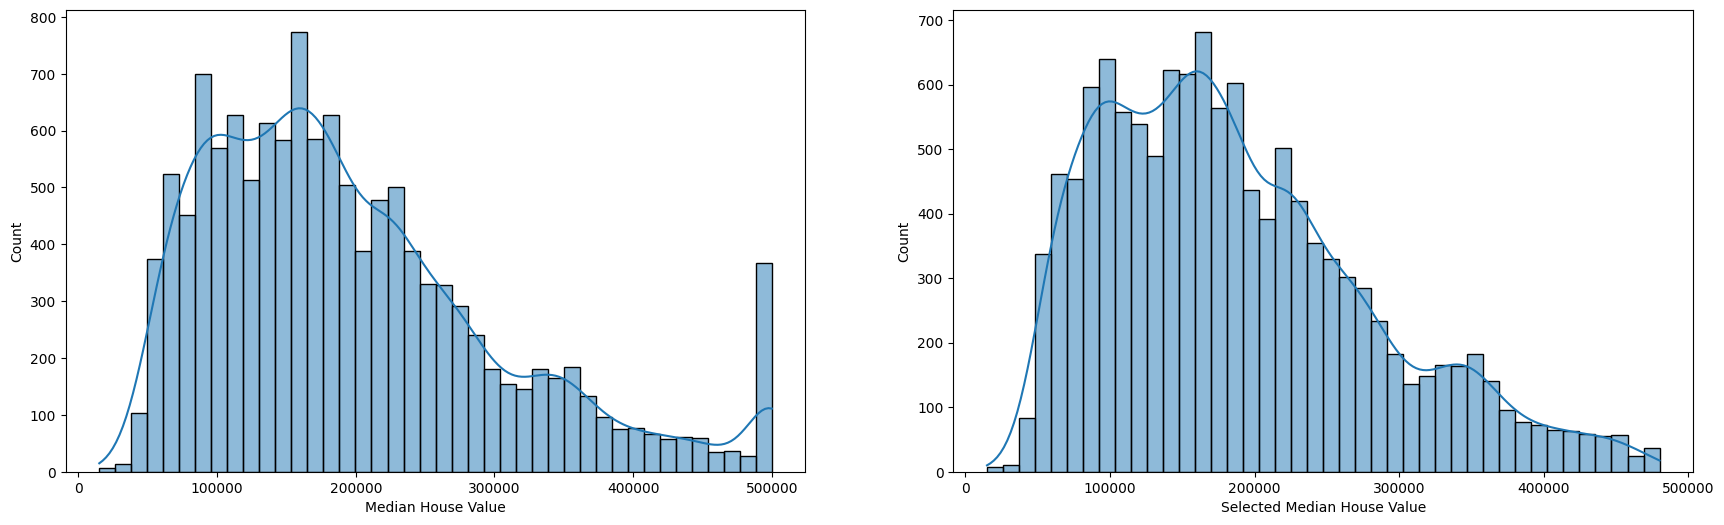

In [49]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
axes[0].set_xlabel('Median House Value')
axes[1].set_xlabel('Selected Median House Value')
sns.histplot(df_model['median_house_value'], ax=axes[0], kde=True)

# Melakukan filtering pada dataset
df_model = df_model[(df_model['median_house_value'] <= 480275)]

# Plot distribusi data setelah filtering
sns.histplot(df_model['median_house_value'], ax=axes[1], kde=True);

In [50]:
# Cek deskriptif statistik kolom 'median_house_value' setelah filtering
df_model['median_house_value'].describe()

count     12236.000000
mean     186962.520186
std       93640.156407
min       14999.000000
25%      113300.000000
50%      170500.000000
75%      241325.000000
max      480100.000000
Name: median_house_value, dtype: float64

#### **Clean Dataset**

In [51]:
#Reset indeks dan menampilkan dataset yang sudah bersih
df_model = df_model.reset_index(drop=True)
display(df_model.head(), df_model.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
4,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12231,-117.10,32.73,24.0,2927.0,704.0,2005.0,668.0,2.2375,NEAR OCEAN,102900.0
12232,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
12233,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
12234,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
12235,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


In [52]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12236 entries, 0 to 12235
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12236 non-null  float64
 1   latitude            12236 non-null  float64
 2   housing_median_age  12236 non-null  float64
 3   total_rooms         12236 non-null  float64
 4   total_bedrooms      12236 non-null  float64
 5   population          12236 non-null  float64
 6   households          12236 non-null  float64
 7   median_income       12236 non-null  float64
 8   ocean_proximity     12236 non-null  object 
 9   median_house_value  12236 non-null  float64
dtypes: float64(9), object(1)
memory usage: 956.1+ KB


Setelah proses data cleaning, dataset memiliki 10 kolom dan 12236 baris. Tidak ada kolom yang dihilangkan dan sebanyak 2212 baris, sekitar 15.3%, dari total data tereliminasi setelah handling missing value dan outlier.

## **MODELING**

In [53]:
# traintest split
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV

# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **Scaling & Encoding**

In [54]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['longitude','latitude','housing_median_age',
                                'total_rooms','total_bedrooms','population',
                               'households','median_income']),
    ('OHE', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity'])
], remainder = 'passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['ocean_proximity'])])

### **Data Splitting**

In [55]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

In [56]:
# Splitting data training dan test dengan proporsi 20%
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

### **Benchmark Model**

In [57]:
# Define Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat model
#models = [log_lr, log_knn, log_rf, log_dt, log_xgb]
models = [lr, knn, rf, dt, xgb]

# Scaling data
scaler = RobustScaler()

# Nilai KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=kf, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=kf, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=kf, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-59003.88183593 -54735.30435254 -58176.13550314 -58279.01252781
 -60073.96952055] LinearRegression()
[-43734.99548038 -40913.63463393 -43416.91783273 -43157.57825514
 -44636.86134411] LinearRegression()
[-0.2697406  -0.26245708 -0.28858234 -0.27067847 -0.27308947] LinearRegression()


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-56982.15683196 -53791.63765791 -55025.13265316 -53921.96841105
 -57173.67064483] KNeighborsRegressor()


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-39431.51225741 -37246.12870276 -38666.13881512 -37856.0961676
 -39882.26928973] KNeighborsRegressor()


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.22739548 -0.22654484 -0.23885397 -0.22662968 -0.23046936] KNeighborsRegressor()


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-47144.23892386 -42971.47692616 -46219.62719607 -44432.48057052
 -48337.22140184] RandomForestRegressor(random_state=42)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-31627.11179265 -29699.50083759 -31242.56061798 -30494.54875319
 -32643.29335207] RandomForestRegressor(random_state=42)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.18401593 -0.18075615 -0.19966575 -0.18632796 -0.19183037] RandomForestRegressor(random_state=42)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-66788.72020085 -61284.33098026 -62656.36652071 -65755.90587067
 -68563.61625521] DecisionTreeRegressor(random_state=42)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-43828.03932584 -41222.8804903  -42126.25127681 -43952.83597343
 -46489.2187021 ] DecisionTreeRegressor(random_state=42)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.25617554 -0.2420062  -0.254379   -0.25252915 -0.26885615] DecisionTreeRegressor(random_state=42)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-44110.20331938 -40812.71005702 -44599.60837896 -43086.39662056
 -45643.79753435] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-29731.52078612 -28567.95855844 -30573.42606255 -29469.70148226
 -30671.01982966] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


C:\Users\Elaina\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[-0.17261599 -0.17645472 -0.19556376 -0.1806719  -0.17994037] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


In [59]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'RandomForest Regressor', 'DecisionTree Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58053.660748,1792.308027,-43171.997509,1234.762287,-0.272910,0.008602
1,KNN Regressor,-55378.913240,1453.192132,-38616.429047,972.112374,-0.229979,0.004662
2,RandomForest Regressor,-45821.009004,1912.537738,-31141.403071,999.932276,-0.188519,0.006642
3,DecisionTree Regressor,-65009.787966,2674.644260,-43523.845154,1806.527859,-0.254789,0.008585
4,XGBoost Regressor,-43650.543182,1640.526336,-29802.725344,773.115633,-0.181049,0.007801


Dari hasil cross validation, model **RandomForest dan XGBoost memiliki nilai rata-rata yang paling mendekati nol**, sehingga dapat dikatakan bahwa kedua model tersebut memiliki akurasi yang terbaik. Selanjutnya karena selisih nilai cross validasi yang sangat kecil antara kedua model ini, maka akan dibandingkan kembali dengan tes set.

### **Predict to Test Set with the Benchmark Model**

In [60]:
#Model
models = {
    'RandomForest Regressor': rf,
    'XGBoost Regressor': xgb
}

score_rmse = []
score_mae = []
score_mape = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse,
                                    'MAE': score_mae,
                                    'MAPE': score_mape}, index=models.keys())
                                   
score_before_tuning

,RMSE,MAE,MAPE
RandomForest Regressor,45185.772752,30623.933440,0.185090
XGBoost Regressor,44577.512299,30591.056396,0.183301


Nilai untuk RMSE, MAE, maupun MAPE untuk model XGBoost tetap lebih kecil dibandingkan model RandomForest. Hal ini menandakan bahwa model XGBoost lebih akurat dibandingkan model RandomForest. Sehingga **XGBoost dipilih sebagai model akhir**.

### **Hyperparameter Tuning**

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [61]:
#Menampilkan parameter hypertuning yang ada
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'scaler', 'model', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__scaler', 'preprocessing__OHE', 'preprocessing__scaler__copy', 'preprocessing__scaler__quantile_range', 'preprocessing__scaler__unit_variance', 'preprocessing__scaler__with_centering', 'preprocessing__scaler__with_scaling', 'preprocessing__OHE__categories', 'preprocessing__OHE__drop', 'preprocessing__OHE__dtype', 'preprocessing__OHE__handle_unknown', 'preprocessing__OHE__max_categories', 'preprocessing__OHE__min_frequency', 'preprocessing__OHE__sparse', 'scaler__copy', 'scaler__quantile_range', 'scaler__unit_variance', 'scaler__with_centering', 'scaler__with_scaling', 'model__objective', 'model__base_score', 'model__booster', 'model__callbacks', 'model__colsample_bylevel',

In [62]:
#Menentukan rentang parameter
param_xgb = {
    #Booster Parameters
    'model__colsample_bytree': list(np.arange(1, 11)/10),
    'model__gamma': list(np.arange(0, 10)), #semakin besar, model semakin konservatif
    'model__learning_rate': list(np.arange(1, 31)/100),
    'model__max_delta_step': list(np.arange(0, 11)),
    'model__max_depth': list(np.arange(1, 11)),
    'model__reg_alpha' : list(np.logspace(-3, 1, 20)),
    'model__reg_lambda': list(np.arange(1, 11)),
    'model__subsample': list(np.arange(1, 11)/10),
    }

In [63]:
# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = param_xgb,
    n_iter = 100,
    cv = kf, 
    scoring = {
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error',
        'mape': 'neg_mean_absolute_percentage_error'
               }, 
    n_jobs = -1,
    refit = 'rmse',
    random_state = 42  
)

In [64]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('OHE',
                                                                               OneHotEncoder(drop='first',
                                                                                             han...
                                                             0.8858667904100823,
                                                             1.438449888287663,
                                                             2.3357214690901213,
                                                             3.792690190732246,
                                                             6.158482110660261,
                                                             10.0],
                                        'model__reg_lambda': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0]},
                   random_state=42, refit='rmse',
                   scoring={'mae': 'neg_mean_absolute_error',
                            'mape': 'neg_mean_absolute_percentage_error',
                            'rmse': 'neg_root_mean_squared_error'})

In [65]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
pd.DataFrame({'Parameter': random_xgb.best_params_})

XGBoost
Best_score: -43247.418155423264


,Parameter
model__colsample_bytree,0.800000
model__gamma,5.000000
model__learning_rate,0.190000
model__max_delta_step,0.000000
model__max_depth,7.000000
model__reg_alpha,0.029764
model__reg_lambda,6.000000
model__subsample,1.000000


### **Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [66]:
# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

xgb_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=['XGBoost Tuned'])
xgb_after_tuning

,RMSE,MAE,MAPE
XGBoost Tuned,43214.026949,29361.538597,0.176653


### **Performance Comparison**

Membandingkan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [67]:
# Sebelum hyperparameter tuning
xgb_before_tuning = pd.DataFrame(score_before_tuning.loc['XGBoost Regressor']).T

In [68]:
# Comparison
xgb_compare = pd.concat([xgb_before_tuning, xgb_after_tuning])
xgb_compare

,RMSE,MAE,MAPE
XGBoost Regressor,44577.512299,30591.056396,0.183301
XGBoost Tuned,43214.026949,29361.538597,0.176653


Jika dibandingkan, model mengalami peningkatan performa setelah dilakukannya hyperparameter tuning. Dapat dilihat dengan berkurangnya nilai RMSE, MAE, dan MAPE.

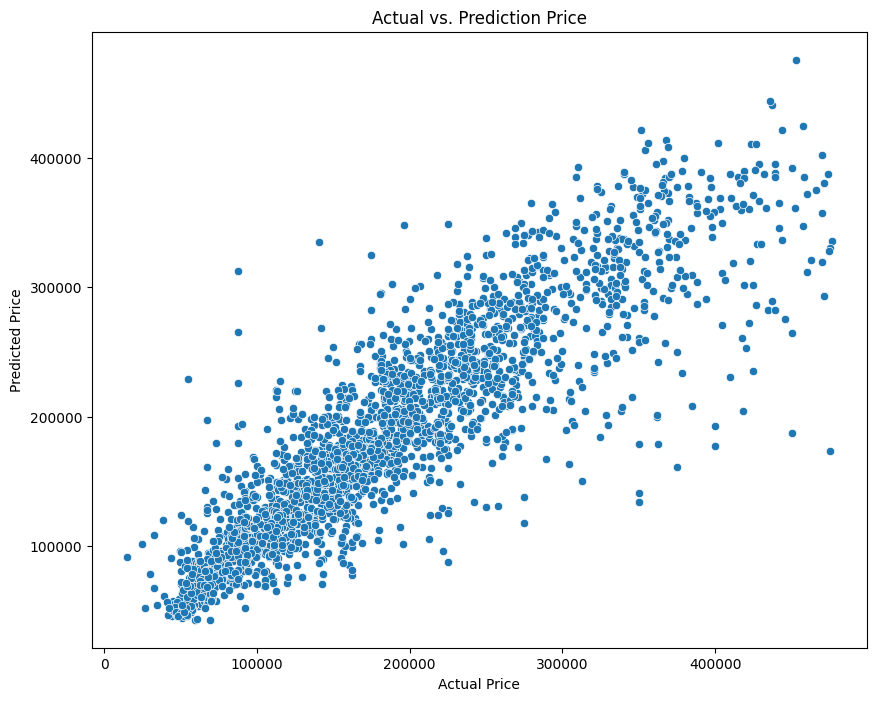

In [69]:
plt.figure(figsize=(10, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Dari plot diatas tergambarkan bahwa terdapat *underestimation* (harga prediksi lebih kecil dari harga aktual) dan *overestimation* (harga prediksi lebih tinggi dari harga aktual) pada model. Hal ini menyebabkan adanya perbedaan yang signifikan antara nilai RMSE dan MAE. Semakin tinggi harga median dari properti, semakin besar juga error-nya dan agak condong ke *underestimation*. Namun, nilai MAPE sebesar 17.66% menjadikan model ini dapat dikategorikan ke dalam *`good forecasting`* (Lewis, 1982, p. 40.)

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

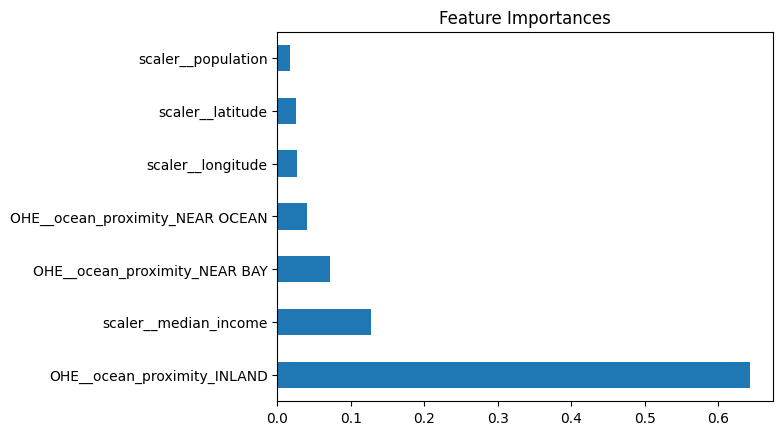

In [70]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(7)
feature_imp.plot(kind='barh', title='Feature Importances');

Dari plot diatas, yang paling mempengaruhi harga dari perumahan adalah posisinya dari laut (ocean_proximity) dan penghasilan dari keluarga di blok tersebut (median_income). Letak geografis juga cukup berpengaruh, begitu juga populasi di blok tersebut, namun tidak sebesar dua fitur sebelumnya.

## **KESIMPULAN**

Terdapat beberapa hal yang dapat disimpulkan, yaitu:

1. Berdasarkan nilai dari metrik evaluasi yang digunakan (RMSE, MAE, dan MAPE), model regresi XGBoost adalah model yang paling akurat untuk melakukan prediksi harga berdasarkan fitur yang sudah ditentukan. Dan parameter hyperturning meningkatkan akurasi dari model yang dipilih.
3. Fitur yang paling mempengaruhi harga rumah adalah posisinya dari laut (ocean_proximity) dan pengasilan keluarga (median_income).
4. Prediksi harga yang didapat dari model sudah cukup akurat, meskipun terdapat *underestimation* dan *overestimation* pada prediksi yang dihasilkan, tetapi dengan nilai MAPE sebesar 17.66% model masih termasuk kategori *`good forecasting`*.

## **REKOMENDASI**

Terdapat beberapa hal yang dapat direkomendasikan untuk meningkatnya performa dari model sehingga memberikan prediksi yang lebih akurat:

1. Menggunakan data yang terbaru, sehingga model dapat memberikan prediksi yang lebih akurat dengan keadaan saat ini.
2. Menambahkan fitur yang relevan dan memiliki pengaruh yang cukup kuat terhadap harga rumah, misalnya luas area perumahan dan tipe bangunan.
3. Dengan nilai MAPE sebesar 17.66%, perusahaan dapat mempertimbangkan kemungkinan *underestimation* dan *overestimation* pada prediksi. *Underestimation* perlu diperhatikan saat perhitungan revenue dan *overestimation* perlu diperhatikan saat perencanaan biaya pembangunan.